In [15]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import equilateral_real, realcontour_nd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from plind_tests.gaussian import Gaussian

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
testfunction = Gaussian(2)


In [17]:
# init model
delta = 0.4
Nstep = 150
dt_init = 8e-3
thresh =-60
tmax = dt_init*400

#%lprun -f realcontour_nd realcontour_nd(5, (-0.5,0.5,-0.5,0.5))

contour = realcontour_nd(10, (-0.5,0.5,-0.5,0.5))


plind = plmodel(contour, testfunction.expfun, grad=testfunction.gradh, expargs=testfunction.expargs)


In [18]:
plind.descend(delta, thresh, tmax, dt_init)

edge reconstruction:  0.0006468296051025391 , refinement:  0.00322723388671875
edge reconstruction:  0.0020291805267333984 , refinement:  0.004773139953613281
edge reconstruction:  0.0042362213134765625 , refinement:  0.011494159698486328
edge reconstruction:  0.00716400146484375 , refinement:  0.019076108932495117
edge reconstruction:  0.010953187942504883 , refinement:  0.03861188888549805


/Users/DylanJow/plind/plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


edge reconstruction:  0.014777183532714844 , refinement:  0.0521092414855957
edge reconstruction:  0.016918182373046875 , refinement:  0.07441926002502441
edge reconstruction:  0.017062902450561523 , refinement:  0.06404304504394531
edge reconstruction:  0.017238855361938477 , refinement:  0.05773186683654785
edge reconstruction:  0.01460576057434082 , refinement:  0.05828595161437988
edge reconstruction:  0.01937580108642578 , refinement:  0.07352709770202637
edge reconstruction:  0.016410112380981445 , refinement:  0.05696296691894531
edge reconstruction:  0.01487588882446289 , refinement:  0.05981802940368652
edge reconstruction:  0.017358064651489258 , refinement:  0.07110714912414551
edge reconstruction:  0.017062902450561523 , refinement:  0.06293416023254395
total steps: 42 current time: 3.211234087247984


In [19]:
plind.integrate()
print(plind.integral)
print(testfunction.integral(*testfunction.expargs))
print(np.imag(testfunction.integral(*testfunction.expargs))/np.imag(plind.integral[0]))

((2.0081647695918085e-16+3.141592653589791j), 3.1115167462314532e-15)
3.141592653589793j
1.0000000000000007


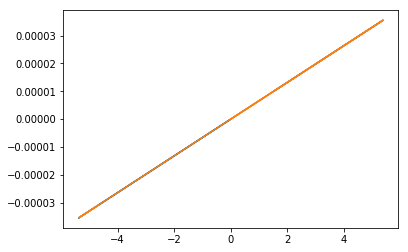

In [20]:
plt.figure()
plt.plot(np.real(plind.contour.points[:,0]), (np.real(plind.contour.points[:,0])-np.imag(plind.contour.points[:,0])))
plt.plot(np.real(plind.contour.points[:,1]), (np.real(plind.contour.points[:,1])-np.imag(plind.contour.points[:,1])))
plt.show()

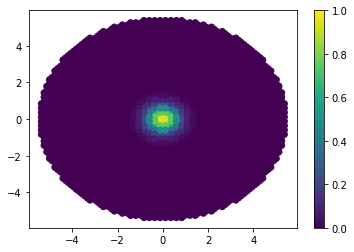

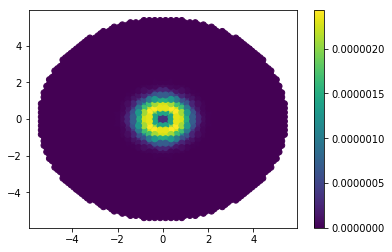

In [21]:
intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])


intvals = np.array([intfun(p, 2) for p in plind.contour.points])
#triang = mtri.Triangulation(xs,ys,plind.contour.simplices)

plt.figure()
plt.scatter(xs, ys, c=intvals.real)
#plt.triplot(triang, alpha=0.8)
plt.colorbar()
plt.show()


plt.figure()
plt.scatter(xs, ys, c=intvals.imag)
plt.colorbar()
plt.show()

